# Statistical Analysis use case

<div class="alert alert-info">

## Context and data
We work on a csv file with some data.
It's an extract of made up data of a CRM of online retailer that sells shoes.
It gathers a few transactions made by customers, with some descriptive data about the customer (*Name*, *origin*, *gender*, *height* (in feet), *weight* (in kilogram), *shoe size*, how long the customer spent on the website (*Time spent on site*, in minutes), what brands he prefers (*Preferred brand*), and how much he spent (*Invoice amount*, in EUR).

*Note: this is not real data, it's been made up for the purpose of the exercise.*

## Exercise Instructions

1. Load the file, read the data.  
   Perform a **descriptive analysis** of the target and the features.  
   You are free to use the approach that you prefer.
   
2. Develop a **model that will predict the invoice amount**, based on other variables.  
   You are free to choose whatever method and approach you like.  
   Discuss.
3. Make a **synthesis** (beamer presentation, powerpoint, google slides, open office, jupyter slides, ...) with **up to 3 slides** presenting the results of your analysis.


</div>

#### Expected Results (test)

|Client|Height|Shoe size|Weight|Time spent on site| Invoice amount|
|:---|:---|:---|:---|:---|:---|
|Carmen| 23 | 32 | 50 | 42 | ? |
|John| 104 | 29 | 335 | 16 | ? |

#### Objectives & first thoughts
Here we analyse data of transactions made by customers. We want to develop a model that will predict the **invoice amount**.<br>
We can ask ourselves few questions before to start:
* What variable(s) could impact the money we spend on a online shoe retrail shop ? (buying expensive brands, buying many shoes, ...)
* How impactful could be these variables ? (maybe shoes are more expensive above a certain shoe size, maybe customers from certain origin or gender buy more shoes, ...)
* How the variables are link to each other (people with big feets tends to be taller on a human anatomy referential)  

___

# <p> &#128095; <font color=palevioletred> 1. Descriptive Analysis </font></p>
Load file, read data, perform a descriptive analysis of the target and the features. <br><br>


Targets: dependent variable (syn: explained variable, output variable, "y")<br>
Features: independent variables (syn: explanatory variable, input variable, "X") used to make predictions. The number of feature is the dimention.

### <p> &#128094; <font color=slateblue> a. Libraries </font></p>

In [1]:
# Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # statistical visualization
import seaborn as sns # (nice) statistical visualization
from scipy import stats # statistical tests

### <p> &#128094; <font color=slateblue> b. Import dataset  </font></p>

In [2]:
# Importing the dataset
df = pd.read_csv('shoes_modif.csv', sep=';').dropna().reset_index(drop=True) # load clean csv data. Splitter is semi-colon
df.sample(10) # sample 10 random lines in the dataset

,Client,Origin,Gender,Height,Shoe_size,Weight,Time_spent_on_site,Preferred_brand,Invoice_amount
11,Stanley,Mars,M,37,31,133,23,Brand A,148
29,Leticia,Pluto,F,111,29,356,21,Brand A,217
0,Willard,Mars,M,9,26,50,28,Brand A,153
18,Blake,Pluto,M,100,24,315,14,Brand D,214
9,Robin,Earth,M,5,33,40,40,Brand C,123
14,Henry,Earth,M,4,34,39,49,Brand B,140
5,Elijah,Mars,M,22,30,88,44,Brand C,137
12,Max,Earth,M,6,26,43,24,Brand C,122
15,Sara,Pluto,F,91,29,296,11,Brand B,246
27,Sonia,Earth,F,2,27,24,29,Brand C,152


In [3]:
print ('The data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The data has 30 rows and 9 columns


In [4]:
df.info() # contains data types (df.dtypes) + other data infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
Client                30 non-null object
Origin                30 non-null object
Gender                30 non-null object
Height                30 non-null int64
Shoe_size             30 non-null int64
Weight                30 non-null int64
Time_spent_on_site    30 non-null int64
Preferred_brand       30 non-null object
Invoice_amount        30 non-null int64
dtypes: int64(5), object(4)
memory usage: 2.2+ KB


Analysis of colums values:<br>
1 Client - customer's first name (nominal: 'Willard', 'Derrick', 'Olivia') <br>
2 Origin - customer's origin (nominal: 'Mars', 'Pluto', 'Earth') <br>
3 Gender - customer's gender (binary: 'F' - female or 'M' - male) <br>
4 Height - customer's height in feet (numeric: from 2 to 116) <br>
5 Shoe size - customer's shoe size (numeric: from 22 to 40) <br>
6 Weight - client's weight in kilograms (numeric: from 24 to 378) <br>
7 Time spent on site - time spent on the website (numeric: from 4 to 51) <br>
8 Preferred brand - customer's prefered brand (nominal: 'Brand A', 'Brand B', 'Brand C') <br>
9 Invoice amount - customer's invoice amount in euros (numeric: from 118 to 257) <br>

In [5]:
df.describe() # descriptive statistic of numerical values

,Height,Shoe_size,Weight,Time_spent_on_site,Invoice_amount
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,43.500000,29.633333,153.866667,29.333333,175.733333
std,44.240526,3.727654,132.283325,13.097337,45.653820
min,2.000000,22.000000,24.000000,4.000000,118.000000
25%,5.250000,27.250000,40.250000,18.000000,142.000000
50%,22.000000,29.000000,88.500000,29.000000,155.500000
75%,97.750000,32.000000,310.250000,40.000000,216.250000
max,116.000000,40.000000,378.000000,51.000000,258.000000


There are no null values and the 9 columns all have 30 values each, and all the numeric values are larger than zero. This mean that we would not need any pre processing stage to clean the data. Here the dataset is small and can be observed by "human eye" in a short time.<br>
The minimum `Invoice_amount` is 118 euros and the maximum is 258 euros.

### <p> &#128094; <font color=slateblue> c. Target and features visualisations </font></p>
#### Numerical features

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


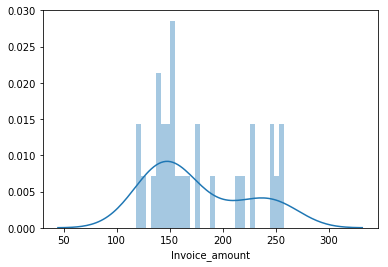

In [6]:
plt.figure(figsize=(6, 4))
sns.distplot(df['Invoice_amount'], bins=30);

`Invoice_amount` histogram shows:
* A deviation from the **normal distribution**
* A **bimodal** gaussian with a highest spike arround 150

We can think that there are two types of behaviour (arround 150 and arround 250)

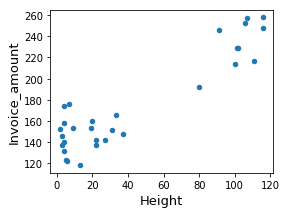

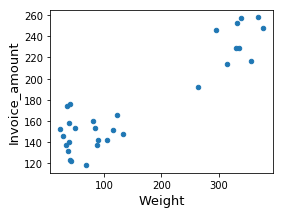

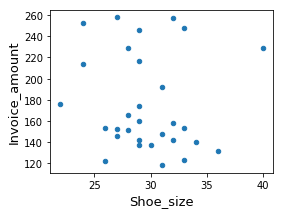

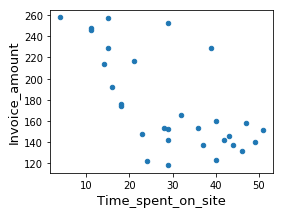

In [7]:
# scatter plot for relationships between Invoice_amount and numerical features
var = ['Height', 'Weight', 'Shoe_size', 'Time_spent_on_site']
for i in range(len(var)):  
    data = pd.concat([df['Invoice_amount'], df[var[i]]], axis=1)    
    data.plot.scatter(x=var[i], y='Invoice_amount', figsize=(4, 3));
    plt.xlabel(var[i], fontsize=13)
    plt.ylabel('Invoice_amount', fontsize=13)

#### Categorical features

In [8]:
df.Client.unique()

array(['Willard', 'Derrick', 'Olivia', 'Marc', 'Alice', 'Elijah', 'Clyde',
       'Angel', 'Randy', 'Robin', 'Elias', 'Stanley', 'Max', 'Dewey',
       'Henry', 'Sara', 'Lynn', 'Ira', 'Blake', 'Freda', 'Kenneth',
       'Kerry', 'Shaun', 'Victoria', 'Monique', 'Deborah', 'Eric',
       'Sonia', 'Enrique', 'Leticia'], dtype=object)

The customer name (represented by the variable `Client`) is like an ID, it won't give us significative information to forecast the invoice amount.

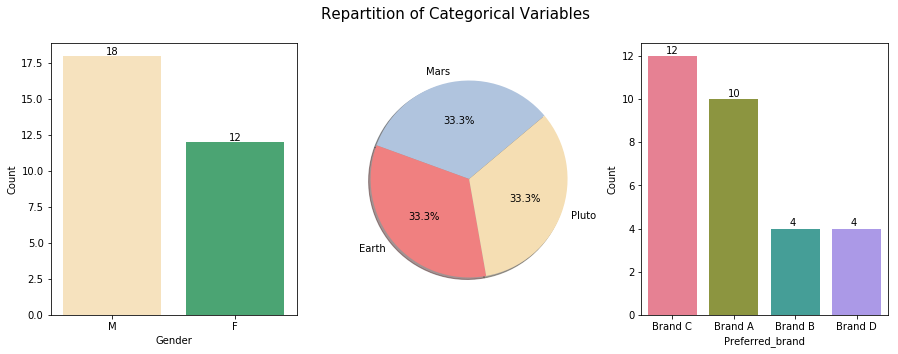

In [9]:
plt.figure(figsize = (15,5))

# Gender
plt.subplot(1,3,1)
color_gender = ['moccasin','mediumseagreen']
sns.countplot(df.Gender, palette=color_gender)
plt.ylabel('Count')
for i in range(len(df.Gender.unique())):
    count = df.groupby("Gender").size().sort_values(ascending=False)[i]
    plt.text(i-0.05,count+0.3,str(count),va='center')

# Origin
plt.subplot(1,3,2)
labels =df['Origin'].value_counts(sort = True).index
sizes = df['Origin'].value_counts(sort = True)
color_origin = ["lightsteelblue","lightcoral","wheat"]
plt.pie(sizes, labels=labels, colors=color_origin,
        autopct='%1.1f%%', shadow=True, startangle=400)

# Brand
plt.subplot(1,3,3)
sns.countplot(df['Preferred_brand'], order = df['Preferred_brand'].value_counts().index, palette="husl")
plt.ylabel('Count')
for i in range(len(df['Preferred_brand'].unique())):
    count = df.groupby("Preferred_brand").size().sort_values(ascending=False)[i]
    plt.text(i-0.1,count+0.25,str(count),va='center')

    
plt.suptitle("Repartition of Categorical Variables",size=15)
plt.show()

The dataset is composed of 60% of male customers and 40% of female customers. 1/3 of customers come from Mars, 1/3 from Earth, and 1/3 from Pluto. Customers seems to prefer in majority the Brand C (40%), then the Brand A (33%), and lastly the brands B and D (13%). 

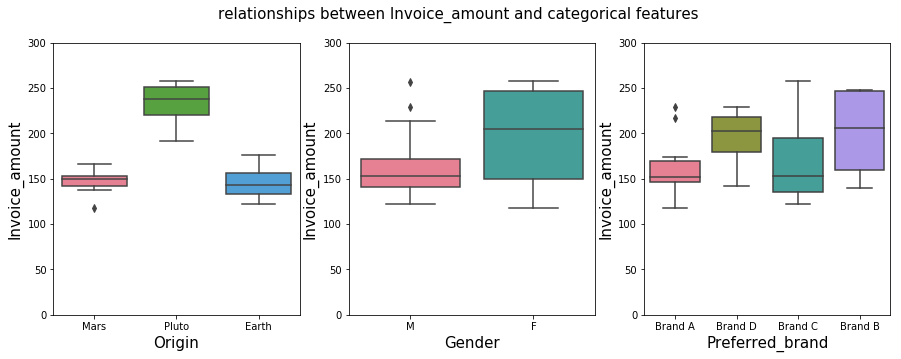

In [10]:
# box plot for relationships between Invoice_amount and categorical features
var = ['Origin', 'Gender', 'Preferred_brand']
plt.figure(figsize = (15,5))
for i in range(len(var)):
    plt.subplot(1,3,i+1)
    data = pd.concat([df['Invoice_amount'], df[var[i]]], axis=1)
    #f, ax = plt.subplots(figsize=(4, 4))
    fig = sns.boxplot(x=var[i], y="Invoice_amount", data=data, palette="husl")
    plt.xlabel(var[i], fontsize=15)
    plt.ylabel('Invoice_amount', fontsize=15)
    fig.axis(ymin=0, ymax=300);

plt.suptitle("relationships between Invoice_amount and categorical features",size=15)
plt.show()

#### Crossing Variables with invoice amount

In [11]:
groupcol = ['Origin', 'Gender', 'Height', 'Shoe_size', 'Weight', 'Time_spent_on_site', 'Preferred_brand']
invoicecol = ['Invoice_amount']

In [12]:
Origin = df.groupby(groupcol[0])[invoicecol].mean()
Origin.head() #interesting results

,Invoice_amount
Origin,
Earth,146.0
Mars,147.0
Pluto,234.2


In [13]:
Gender = df.groupby(groupcol[1])[invoicecol].mean()
Gender.head()

,Invoice_amount
Gender,
F,195.500000
M,162.555556


In [14]:
Preferredbrand = df.groupby(groupcol[6])[invoicecol].mean()
Preferredbrand.head()

,Invoice_amount
Preferred_brand,
Brand A,163.10
Brand B,200.00
Brand C,172.00
Brand D,194.25


Results of the comparison of the means of categorical data across categories:<br>
(We remember that the mean invoice is 175.733333)<br>

* Plutonian customers generally spend more (about 60% more) than Earth and Mars customers. <br>
* Females customers have spend about 20% more than males customers. <br>
* Brand B is the more popular, Brand A is the less popular (if we assume that they spent their money on their preferred brand).<br>

In [15]:
groupcolsummary = ['Origin', 'Gender', 'Preferred_brand']
summary = df.groupby(groupcolsummary)[invoicecol].mean()
print(summary.to_string())

                               Invoice_amount
Origin Gender Preferred_brand                
Earth  F      Brand A                  141.50
              Brand C                  152.00
       M      Brand A                  166.00
              Brand B                  140.00
              Brand C                  138.25
Mars   F      Brand A                  134.50
       M      Brand A                  150.50
              Brand B                  166.00
              Brand C                  148.00
              Brand D                  142.00
Pluto  F      Brand A                  223.00
              Brand B                  247.00
              Brand C                  255.00
              Brand D                  192.00
       M      Brand C                  257.00
              Brand D                  221.50


### <p> &#128094; <font color=slateblue> d. Statistical tests and correlation matrix </font></p>

In [16]:
# Student t test
ttestt2_, ttestp2_gender = stats.ttest_ind(df[df.Gender=='F']['Invoice_amount'],df[df.Gender=='M']['Invoice_amount'])
print("Student t test for gender:", ttest_gender)
ttestt2_earth_mars, ttestp2_earth_mars = stats.ttest_ind(df[df.Origin=="Earth"]['Invoice_amount'],df[df.Origin=="Mars"]['Invoice_amount'])
print("Student t test for earth/mars:", ttestp2_earth_mars)
ttestt2_earth_pluto, ttestp2_earth_pluto = stats.ttest_ind(df[df.Origin=="Earth"]['Invoice_amount'],df[df.Origin=="Pluto"]['Invoice_amount'])
print("Student t test for earth/pluto:", ttestp2_earth_pluto)

NameError: name 'ttest_gender' is not defined

The average invoice amount is
* significantly different between men and women
* NOT significantly different between customers from Earth and customers from Mars
* significantly different between customers from Earth and customers from Pluto

In [17]:
# Anova (one way)
anova_origin = stats.f_oneway(df['Invoice_amount'][df['Origin'] == 'Earth'], 
             df['Invoice_amount'][df['Origin'] == 'Mars'],
             df['Invoice_amount'][df['Origin'] == 'Pluto'])
print("Anova for Origin variable:", anova_origin)
anova_brand = stats.f_oneway(df['Invoice_amount'][df['Preferred_brand'] == 'Brand A'], 
             df['Invoice_amount'][df['Preferred_brand'] == 'Brand B'],
             df['Invoice_amount'][df['Preferred_brand'] == 'Brand C'], 
             df['Invoice_amount'][df['Preferred_brand'] == 'Brand D'])
print("Anova for Preffered Brand variable:", anova_brand)


Anova for Origin variable: F_onewayResult(statistic=75.547121218735, pvalue=8.702367968703508e-12)
Anova for Preffered Brand variable: F_onewayResult(statistic=0.8658547299001572, pvalue=0.471267861067427)


The average invoice amount is
* significantly different according to the origin of consumers
* quite similar between the different preferred brand

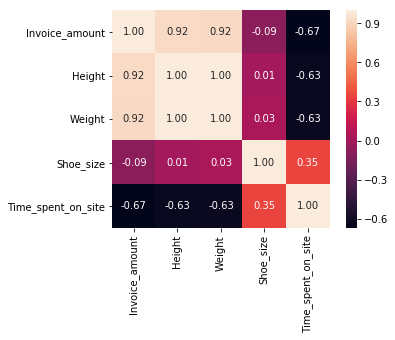

Invoice_amount        1.000000
Height                0.923092
Weight                0.920029
Shoe_size            -0.085291
Time_spent_on_site   -0.670305
Name: Invoice_amount, dtype: float64 



In [18]:
# correlation matrix (for numerical variables)
k = 5 # nb of variables
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Invoice_amount')['Invoice_amount'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# detailed values
print(corrmat['Invoice_amount'].sort_values(ascending=False), '\n')

Correlations analysis
*	When the result is close to 1 : The correlation is significative and positive, the x variable influence positively the y variable
*	When the result is close to 0 : The correlation is non significative, no influence of x on y
*	When the result is close to - 1 : The correlation is significative and negative, the x variable influence negatively the y variable


Features such as `Weight` and `Height` seems to be highly correlated (0.92) with `Invoice_amount`.<br>
The `Time_spent_on_site` might slightly (-0.67) influence negatively the `Invoice_amount` (the more time you spend on the site, the less money you spend).<br>
The `Shoe_size` has a very weak correlation with the invoice amount (0.35), this variable isn't significant for our prediction.<br>
We also notice that `Weight` and `Height`are correlated together as we expected (1.0).<br>

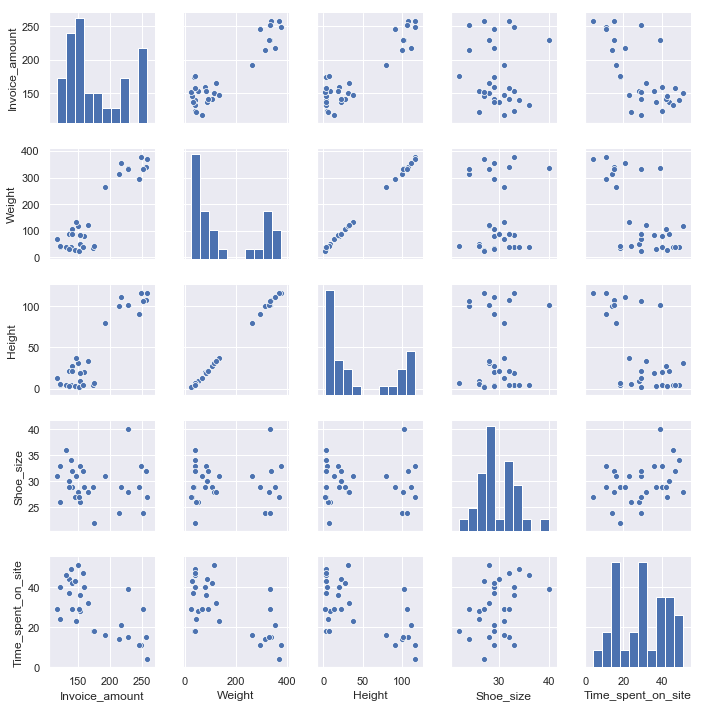

In [19]:
# scatterplot for relationships between Invoice_amount and correlated variables
sns.set()
cols = ['Invoice_amount', 'Weight', 'Height', 'Shoe_size', 'Time_spent_on_site']
sns.pairplot(df[cols], height = 2)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


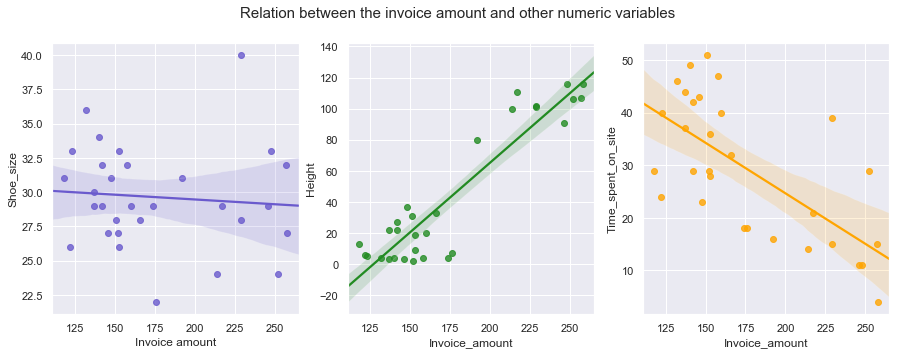

In [20]:
# Selected plots from above for relationships between Invoice_amount and correlated numeric variables
plt.figure(figsize = (15,5))

# Shoe Size
plt.subplot(1,3,1)
s = sns.regplot(x="Invoice_amount", y="Shoe_size", color = 'slateblue',data=df);
s.set_xlabel("Invoice amount")
s.set_ylabel("Shoe_size")

# Height (/Weight)
plt.subplot(1,3,2)
s = sns.regplot(x="Invoice_amount", y="Height", color = 'forestgreen',data=df);
s.set_xlabel("Invoice_amount")
s.set_ylabel("Height")

# Time
plt.subplot(1,3,3)
s = sns.regplot(x="Invoice_amount", y="Time_spent_on_site", color = 'orange',data=df);
s.set_xlabel("Invoice_amount")
s.set_ylabel("Time_spent_on_site")

plt.suptitle('Relation between the invoice amount and other numeric variables',size=15)
plt.show()

___
# <p> &#128095; <font color=palevioletred> 2. Prediction model </font></p>
Develop a model that will predict the **invoice amount**, based on other variables

## <p> &#128097; <font color=rebeccapurple> A. Preprocessing  </font></p>

Feature selection is about choosing the relevant information.

"Benefits of variable and feature selection: facilitating data visualization
and data understanding, reducing the measurement and storage requirements, reducing training and
utilization times, defying the curse of dimensionality to improve prediction performance." [[Guyon & Elisseeff (2003)]](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf)

We are searching to predict a number from continuous values so it is a supervised (we have labelled data) regression problem.

In [21]:
# define categorical variables
df['Gender'] = pd.Categorical(df['Gender'])
df['Origin'] = pd.Categorical(df['Origin'])
df['Preferred_brand'] = pd.Categorical(df['Preferred_brand'])

# drop Client (name)
df.drop('Client', axis=1, inplace=True)
df.head()

,Origin,Gender,Height,Shoe_size,Weight,Time_spent_on_site,Preferred_brand,Invoice_amount
0,Mars,M,9,26,50,28,Brand A,153
1,Pluto,M,102,40,335,39,Brand D,229
2,Mars,F,13,31,68,29,Brand A,118
3,Mars,M,20,29,81,40,Brand C,160
4,Pluto,F,116,33,378,11,Brand B,248


In [22]:
# transform categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,Height,Shoe_size,Weight,Time_spent_on_site,Invoice_amount,Origin_Mars,Origin_Pluto,Gender_M,Preferred_brand_Brand B,Preferred_brand_Brand C,Preferred_brand_Brand D
0,9,26,50,28,153,1,0,1,0,0,0
1,102,40,335,39,229,0,1,1,0,0,1
2,13,31,68,29,118,1,0,0,0,0,0
3,20,29,81,40,160,1,0,1,0,1,0
4,116,33,378,11,248,0,1,0,1,0,0


In [23]:
# create data set
from sklearn.model_selection import train_test_split
X = df[df.loc[:, df.columns != 'Invoice_amount'].columns]
y = df['Invoice_amount']

# split dataset into training set and test set
# (we have a really small amount of data, we could use the totality of the dataset to make it as accurate as possible) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42) # 20% test 80% train

In [24]:
# just checking it's ok
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
     Height  Shoe_size  Weight  Time_spent_on_site  Origin_Mars  Origin_Pluto  \
28       4         32      39                  47            0             0   
24     106         24     333                  29            0             1   
12       6         26      43                  24            0             0   
0        9         26      50                  28            1             0   
4      116         33     378                  11            0             1   

    Gender_M  Preferred_brand_Brand B  Preferred_brand_Brand C  \
28         1                        0                        0   
24         0                        0                        1   
12         1                        0                        1   
0          1                        0                        0   
4          0                        1                        0   

    Preferred_brand_Brand D  
28                        0  
24                        0  
12                    

## <p> &#128097; <font color=rebeccapurple> B. MAIN MODEL  </font></p>
### <p> &#128094; <font color=slateblue> a. Regression model  </font></p>


Multiple Linear Regression (MLR)
(I started by trying out this model because it is a classic)

$
\begin{align}
\color{black}{y = \beta_0 + x_1\beta_1 + x_2\beta_2 + ... + x_n\beta_n + \epsilon}
\end{align}
$

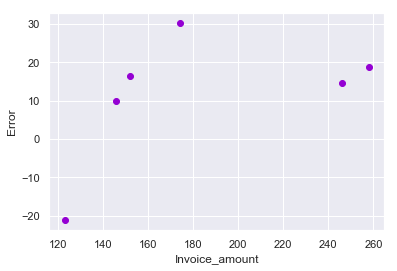

RMSE:
19.52536741680441
Variance score: 0.85


In [25]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
err = y_test - y_pred

plt.scatter(y_test, err, color ='darkviolet')
plt.xlabel('Invoice_amount')
plt.ylabel('Error')

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [26]:
# compare the actual value (y_test) and the prediction (y_pred)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results

,Actual,Predicted
27,152,135.615163
15,246,231.528922
23,258,239.348121
17,146,136.129799
8,174,143.726505
9,123,144.160503


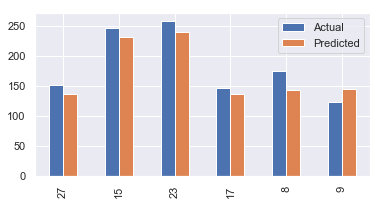

In [27]:
# comparison of actual and predicted values
df_results.plot(kind='bar',figsize=(6,3))
plt.show()

### <p> &#128094; <font color=slateblue> b. Backward Elimination </font></p>

Let's see if we can improve the model by keeping the most relevant features only

In [28]:
X

,Height,Shoe_size,Weight,Time_spent_on_site,Origin_Mars,Origin_Pluto,Gender_M,Preferred_brand_Brand B,Preferred_brand_Brand C,Preferred_brand_Brand D
0,9,26,50,28,1,0,1,0,0,0
1,102,40,335,39,0,1,1,0,0,1
2,13,31,68,29,1,0,0,0,0,0
3,20,29,81,40,1,0,1,0,1,0
4,116,33,378,11,0,1,0,1,0,0
5,22,30,88,44,1,0,1,0,1,0
6,27,29,105,42,1,0,1,0,1,0
7,31,28,116,51,1,0,0,0,0,0
8,4,29,36,18,0,0,1,0,0,0
9,5,33,40,40,0,0,1,0,1,0


In [29]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((30,1)).astype(int), values = X, axis = 1) # add a line of 1 for the constant b0

In [30]:
X

array([[  1,   9,  26,  50,  28,   1,   0,   1,   0,   0,   0],
       [  1, 102,  40, 335,  39,   0,   1,   1,   0,   0,   1],
       [  1,  13,  31,  68,  29,   1,   0,   0,   0,   0,   0],
       [  1,  20,  29,  81,  40,   1,   0,   1,   0,   1,   0],
       [  1, 116,  33, 378,  11,   0,   1,   0,   1,   0,   0],
       [  1,  22,  30,  88,  44,   1,   0,   1,   0,   1,   0],
       [  1,  27,  29, 105,  42,   1,   0,   1,   0,   1,   0],
       [  1,  31,  28, 116,  51,   1,   0,   0,   0,   0,   0],
       [  1,   4,  29,  36,  18,   0,   0,   1,   0,   0,   0],
       [  1,   5,  33,  40,  40,   0,   0,   1,   0,   1,   0],
       [  1, 107,  32, 340,  15,   0,   1,   1,   0,   1,   0],
       [  1,  37,  31, 133,  23,   1,   0,   1,   0,   0,   0],
       [  1,   6,  26,  43,  24,   0,   0,   1,   0,   1,   0],
       [  1,  33,  28, 123,  32,   1,   0,   1,   1,   0,   0],
       [  1,   4,  34,  39,  49,   0,   0,   1,   1,   0,   0],
       [  1,  91,  29, 296,  11,   0,   

In [31]:
# Backward elimination step to repeat several times
# I set the signifcance level to 0.1 (it would be better to have SL=0.05 but let's not be too demanding at first) 
X_optimal = X[:,[0,1,2,3,4,5,6,7,8,9,10]] # 
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() #fit the full model with all predictors (and then we'll remove some)
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     20.57
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           3.96e-08
Time:                        10:58:13   Log-Likelihood:                -119.63
No. Observations:                  30   AIC:                             261.3
Df Residuals:                      19   BIC:                             276.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.1895     26.655      6.685      0.000     122.400     233.978
x1             5.7094      4.023      1.419      0.172      -2.710      14.129
x2             0.4130      1.485      0.278      0.784      -2.695       3.521
x3            -1.7339      1.357     -1.278      0.217      -4.575       1.107
x4            -0.3116      0.366     -0.852      0.405      -1.077       0.454
x5            -7.2567     11.359     -0.639      0.531     -31.032      16.518
x6            40.0696     45.623      0.878      0.391     -55.419     135.559
x7             9.0998      8.246      1.104      0.284      -8.160      26.359
x8             8.3825     10.330      0.811      0.427     -13.238      30.003
x9            -3.7107      8.165     -0.454      0.655     -20.801      13.380
x10          -23.6076     13.442     -1.756      0.095     -51.742       4.527
==============================================================================
Omnibus:                        2.568   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.621
Skew:                          -0.324   Prob(JB):                        0.445
Kurtosis:                       2.063   Cond. No.                     3.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Shoe_size` is the highest p-value (0.784) and 0.784 > 0.1 so I remove it from the model, then repeat this step (I do it manually because there are few variables and I want to check during the process)

In [32]:
X_optimal = X[:,[0,1,3,4,5,6,7,8,9,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     23.96
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           8.03e-09
Time:                        10:58:14   Log-Likelihood:                -119.70
No. Observations:                  30   AIC:                             259.4
Df Residuals:                      20   BIC:                             273.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.3228     23.593      7.686      0.000     132.109     230.537
x1             4.8929      2.686      1.821      0.084      -0.711      10.496
x2            -1.4567      0.899     -1.620      0.121      -3.333       0.419
x3            -0.2592      0.306     -0.847      0.407      -0.898       0.379
x4            -7.6697     10.999     -0.697      0.494     -30.613      15.273
x5            39.7318     44.542      0.892      0.383     -53.181     132.645
x6             9.6446      7.823      1.233      0.232      -6.674      25.963
x7             8.5534     10.071      0.849      0.406     -12.454      29.561
x8            -3.2984      7.842     -0.421      0.679     -19.657      13.060
x9           -22.4436     12.476     -1.799      0.087     -48.467       3.580
==============================================================================
Omnibus:                        2.285   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.616
Skew:                          -0.362   Prob(JB):                        0.446
Kurtosis:                       2.123   Cond. No.                     3.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_optimal = X[:,[0,1,3,4,5,6,7,8,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     28.03
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.57e-09
Time:                        10:58:15   Log-Likelihood:                -119.83
No. Observations:                  30   AIC:                             257.7
Df Residuals:                      21   BIC:                             270.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.0282     21.814      8.161      0.000     132.664     223.393
x1             4.5505      2.509      1.813      0.084      -0.668       9.769
x2            -1.3406      0.839     -1.598      0.125      -3.086       0.404
x3            -0.2692      0.299     -0.900      0.378      -0.891       0.353
x4            -7.5835     10.779     -0.704      0.489     -30.000      14.833
x5            38.3468     43.541      0.881      0.388     -52.201     128.895
x6             8.3316      7.031      1.185      0.249      -6.291      22.954
x7            10.0724      9.215      1.093      0.287      -9.091      29.236
x8           -19.9696     10.784     -1.852      0.078     -42.397       2.457
==============================================================================
Omnibus:                        1.694   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.338
Skew:                          -0.325   Prob(JB):                        0.512
Kurtosis:                       2.195   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_optimal = X[:,[0,1,3,4,6,7,8,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     32.71
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           3.31e-10
Time:                        10:58:16   Log-Likelihood:                -120.18
No. Observations:                  30   AIC:                             256.4
Df Residuals:                      22   BIC:                             267.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.9124     21.561      8.251      0.000     133.197     222.628
x1             4.4908      2.479      1.812      0.084      -0.650       9.632
x2            -1.3929      0.826     -1.686      0.106      -3.106       0.320
x3            -0.2638      0.296     -0.892      0.382      -0.877       0.349
x4            62.4694     26.525      2.355      0.028       7.459     117.480
x5             8.9504      6.896      1.298      0.208      -5.350      23.251
x6            10.3562      9.100      1.138      0.267      -8.515      29.228
x7           -22.7851      9.899     -2.302      0.031     -43.313      -2.257
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.067
Skew:                          -0.133   Prob(JB):                        0.586
Kurtosis:                       2.115   Cond. No.                     2.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X_optimal = X[:,[0,1,3,6,7,8,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     38.37
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           7.41e-11
Time:                        10:58:16   Log-Likelihood:                -120.71
No. Observations:                  30   AIC:                             255.4
Df Residuals:                      23   BIC:                             265.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.6026     20.278      8.462      0.000     129.654     213.552
x1             4.8661      2.432      2.001      0.057      -0.165       9.897
x2            -1.5194      0.810     -1.875      0.074      -3.196       0.157
x3            67.6034     25.779      2.622      0.015      14.276     120.931
x4             9.0359      6.864      1.316      0.201      -5.164      23.236
x5            10.8006      9.046      1.194      0.245      -7.912      29.513
x6           -23.6657      9.805     -2.414      0.024     -43.950      -3.382
==============================================================================
Omnibus:                        0.917   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.785
Skew:                           0.038   Prob(JB):                        0.675
Kurtosis:                       2.211   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X_optimal = X[:,[0,1,3,6,7,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     44.96
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.05e-11
Time:                        10:58:17   Log-Likelihood:                -121.61
No. Observations:                  30   AIC:                             255.2
Df Residuals:                      24   BIC:                             263.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        165.2054     19.730      8.373      0.000     124.484     205.927
x1             3.9917      2.340      1.706      0.101      -0.837       8.820
x2            -1.2213      0.778     -1.570      0.129      -2.826       0.384
x3            67.9868     26.004      2.614      0.015      14.316     121.657
x4             9.3872      6.918      1.357      0.187      -4.892      23.666
x5           -26.1005      9.676     -2.698      0.013     -46.070      -6.131
==============================================================================
Omnibus:                        1.639   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.085
Skew:                          -0.138   Prob(JB):                        0.581
Kurtosis:                       2.110   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X_optimal = X[:,[0,1,3,6,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     53.93
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           6.19e-12
Time:                        10:58:18   Log-Likelihood:                -122.72
No. Observations:                  30   AIC:                             255.4
Df Residuals:                      25   BIC:                             262.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.0860     19.570      8.742      0.000     130.782     211.390
x1             4.0558      2.378      1.705      0.101      -0.842       8.954
x2            -1.2206      0.791     -1.544      0.135      -2.849       0.408
x3            56.6942     25.047      2.263      0.033       5.108     108.280
x4           -21.5370      9.224     -2.335      0.028     -40.534      -2.540
==============================================================================
Omnibus:                        0.672   Durbin-Watson:                   2.517
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.687
Skew:                           0.074   Prob(JB):                        0.709
Kurtosis:                       2.274   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X_optimal = X[:,[0,1,6,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     67.52
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.11e-12
Time:                        10:58:18   Log-Likelihood:                -124.09
No. Observations:                  30   AIC:                             256.2
Df Residuals:                      26   BIC:                             261.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.9515      5.310     26.731      0.000     131.036     152.867
x1             0.4076      0.273      1.492      0.148      -0.154       0.969
x2            56.6010     25.705      2.202      0.037       3.764     109.438
x3           -21.1333      9.462     -2.233      0.034     -40.583      -1.684
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.355
Skew:                          -0.034   Prob(JB):                        0.837
Kurtosis:                       2.472   Cond. No.                         540.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X_optimal = X[:,[0,6,10]]
regr_OLS = sm.OLS(endog = y, exog = X_optimal).fit() 
regr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Invoice_amount   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     95.82
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           5.46e-13
Time:                        10:58:19   Log-Likelihood:                -125.32
No. Observations:                  30   AIC:                             256.6
Df Residuals:                      27   BIC:                             260.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.6820      3.748     39.400      0.000     139.991     155.373
x1            93.6098      6.865     13.635      0.000      79.523     107.696
x2           -23.6393      9.521     -2.483      0.020     -43.174      -4.105
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   2.612
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.198
Skew:                          -0.257   Prob(JB):                        0.549
Kurtosis:                       2.167   Cond. No.                         3.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Quick Conclusion**

It remains `Preferred_brand_Brand D` and `Origin_Pluto` <br>
I doubt of the accuracy of these results and now I am thinking I should have used a logistic regression model instead which is more adapted to categorical data thanks to its sigmoid function. And also it might be more a classification problem because based on the data analysis in part 1, it look like we have two categories (see the scatterplot for relationships between Invoice_amount and correlated variables just after correlation matrix) <br>

Let's still do the prediction, even though the model is not amazing<br>
The features are:
1 `Height` 2 `Shoe_size` 3`Weight` 4 `Time_spent_on_site` 5 `Invoice_amount` 6 `Origin_Mars` 7 `Origin_Pluto` 8 `Gender_M` `Preferred_brand_Brand B` 9 `Preferred_brand_Brand C` 10 `Preferred_brand_Brand D`<br>

The values to test are:

|Client|Height|Shoe size|Weight|Time spent on site| Invoice amount|
|:---|:---|:---|:---|:---|:---|
|Carmen| 23 | 32 | 50 | 42 | ? |
|John| 104 | 29 | 335 | 16 | ? |

So Carmen: [[23, 32, 50, 42, 0, 0, 0, 0, 0, 0]]<br>
So John: [[104, 29, 335, 16, 0, 0, 0, 0, 0, 0]]<br>

In [40]:
regr.predict([[23, 32, 50, 42, 0, 0, 0, 0, 0, 0]]) # Carmen

array([173.47367017])

In [41]:
regr.predict([[104, 29, 335, 16, 0, 0, 0, 0, 0, 0]]) # John

array([187.81273807])

(I know that this is not accurate)

##  <p> &#128097; <font color=rebeccapurple> C. OTHER MODELS </font></p>
Futur steps: checking the accuracy of other models to see if we can find a better one.

### <p> &#128094; <font color=slateblue> a. Decision Tree </font></p>

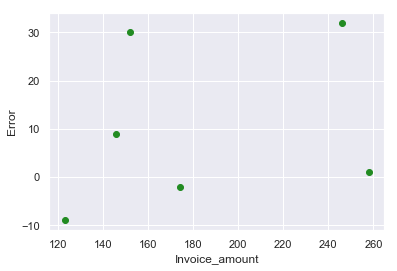

RMSE:
18.66815470259447
Variance score: 0.87


In [42]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
err = y_test - y_pred

plt.scatter(y_test, err , color ='forestgreen')
plt.xlabel('Invoice_amount')
plt.ylabel('Error')


plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred))

### <p> &#128094; <font color=slateblue> b. KNN Regression </font></p>

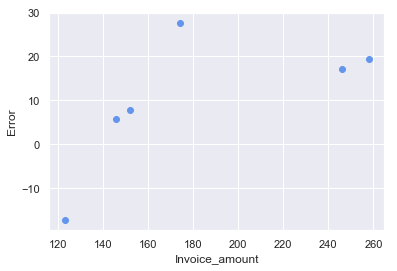

RMSE:
17.453907553579196
Variance score: 0.88


In [43]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
err = y_test - y_pred

plt.scatter(y_test, err , color ='cornflowerblue')
plt.xlabel('Invoice_amount')
plt.ylabel('Error')

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred))

### <p> &#128094; <font color=slateblue> c. XGBooster Regression </font></p>

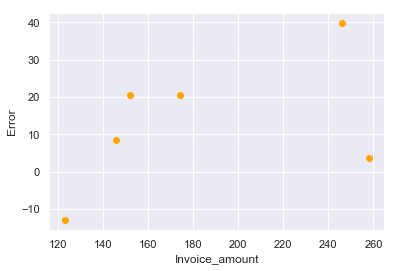

RMSE:
21.143983836417263
Variance score: 0.83


In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss ='huber', max_depth=6)
gbr.fit (X_train, y_train)
y_pred = gbr.predict(X_test)
err = y_test - y_pred

plt.scatter(y_test, err , color ='orange')
plt.xlabel('Invoice_amount')
plt.ylabel('Error')

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred))

### <p> &#128094; <font color=slateblue> d. Logistic regression </font></p>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


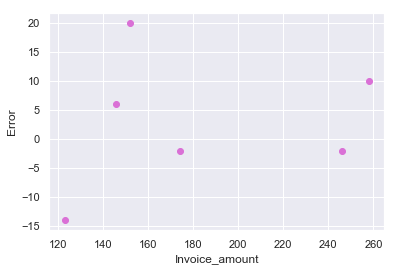

RMSE:
11.105554165971787
Variance score: 0.95


In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
err = y_test - y_pred

plt.scatter(y_test, err, color ='orchid')
plt.xlabel('Invoice_amount')
plt.ylabel('Error')

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:')
print(rmse)

from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)